# Test dtw_missing for univariate time series

In [1]:
%load_ext autoreload
%autoreload 2

import dtw_missing.dtw_missing as dtw_m
import dtw_missing.dtw_missing_visualisation as dtw_m_vis
print(dtw_m.__file__)

import numpy as np

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
print(dtw.__file__)

from scipy.spatial import distance as scpydst

import matplotlib.pyplot as plt

/cw/dtaijupiter/NoCsBack/dtai/aras/Missing_values_in_DTW/missing_dtw_public/dtw_missing/dtw_missing.py
/cw/dtaijupiter/NoCsBack/dtai/aras/miniconda3/envs/missing_dtw_public/lib/python3.11/site-packages/dtaidistance/dtw.py


## Some functions:

In [2]:
def make_column_vector(x): # make the 1-D array a numpy column vector
    x  =  np.array(x).squeeze()
    assert x.ndim == 1
    x  =  np.expand_dims(x, axis=1)
    return x

def pairwise_distances(x, y): # calculate pairwise (squared Euclidean) distance matrix
    # return prdst(x, y)**2
    return scpydst.cdist(x, y)**2 # same result

def plot_warping_switched(y, x, best_path, **kwargs): # plot by switching y and x
    best_path = list(map(lambda o: o[::-1], best_path)) # take the transpose of the path
    
    # dtwvis.plot_warping(x, y, best_path, figsize=(2.5,1.5)) # reverse x and y
    dtwvis.plot_warping(x, y, best_path) # reverse x and y

def plot_missing_warping_switched(y, x, best_path, **kwargs): # plot by switching y and x
    best_path = list(map(lambda o: o[::-1], best_path)) # take the transpose of the path
    
    # dtwvis.plot_warping(x, y, best_path, figsize=(2.5,1.5)) # reverse x and y
    dtw_m_vis.plot_warping(x, y, best_path, figsize=(4,3), **kwargs) # reverse x and y

In [3]:
def apply_and_present_dtw(x, y, dtw_params={}, plot=True): # apply DTW (from dtaidistance) and show the distance, cumulative cost matrix & warping path, and warping between the two time series
    print(f'x = {x}')
    print(f'y = {y}')
    print(f'dtw_params = {dtw_params}')
    d_, paths_ = dtw.warping_paths(y, x, **dtw_params)
    print(f'distance = {d_}')
    best_path_ = dtw.best_path(paths_)
    if plot:
        dtwvis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True)
        plot_warping_switched(y, x, best_path_)

def apply_and_present_dtw_missing(x, y, dtw_params={}, precompute_cost_matrix=False, plot=True): # apply DTW (from dtw_missing) on time series handle missing data and show the distance, cumulative cost matrix & warping path, and warping between the two time series
    print(f'x = {x}')
    print(f'y = {y}')
    print(f'dtw_params = {dtw_params}')
    # print(f'precompute_cost_matrix = {precompute_cost_matrix}')
    if precompute_cost_matrix:
        cost_matrix = pairwise_distances(make_column_vector(y), make_column_vector(x))
        result_fn = np.sqrt
    else:
        cost_matrix = None
        result_fn = None
    
    d_, paths_, best_path_ = dtw_m.warping_paths(y, x, 
                                                 return_optimal_warping_path=True, 
                                                 cost_matrix=cost_matrix, 
                                                 result_fn=result_fn, 
                                                 **dtw_params)
    print(f'distance = {d_}')
    if plot:
        if paths_ is None:
            print('no plots because paths_ is not computed due to infinity distance')
        else:
            dtw_m_vis.plot_warpingpaths(y, x, paths_, best_path_, showlegend=True)

            # plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='edge')
            # plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='middle')
            plot_missing_warping_switched(y, x, best_path_, missing_time_sample_location='interpolation')

## Set default DTW parameters:

In [4]:
dtw_params_default = {
    'window' : None,
    'max_dist' : None,
    'use_pruning' : False,
    'max_step' : None,
    'max_length_diff' : None,
    'penalty' : None,
    'psi' : None, #(2, 3, 4, 5), # (begin series1, end series1, begin series2, end series2)
    'psi_neg' : True,
    'use_c' : False,
    'use_ndim' : False,
}

## Set default time series:

In [5]:
# x = np.array([0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0, 0, 0]) + 0.01
# x = np.array([0, 0.3, 0.7, 1.5, 1.3, 0.1, 0, 0, 0.9, 0.7, 0, 0]) + 0.01
x = np.array([0, 0, 1, 1.5, 1.7, 0.8, 0.4, 0.4, 1.1, 0, 0, 0.3, 0.3, 0, 0]) + 0.15
# x = np.array([0, 0, 1, 1.5, 1.7, 0.8, 0.4, 0.4, 1.1, 0, 0, 0.5, 0]) + 0.15
# x = np.array([0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0]) + 0.01
# x = np.array([3, 4]) + 10

# y = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0])
# y = np.array([0, 0.1, 0.7, 1.5, 1, 0, 0.8, 0.8, 0.8, 0.8, 0.5, 0])
y = np.array([0, 1, 1.5, 1.5, 1.3, 0, 0, 1.1, 1.1, 1.1, 0])
# y = np.array([0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.7, 1.3, 1.5, 1.3, 0.7, 0.3, 0.1, 0])
# y = np.array([0, 0]) + 10

# x = np.array([1, 2, 3])
# y = np.array([0, 0, 0])

## Test DTW from dtaidistance and DTW-missing (including DTW-AROW):

### Time series without missing data:

#### Test DTW from dtaidistance:

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.2257650672131262


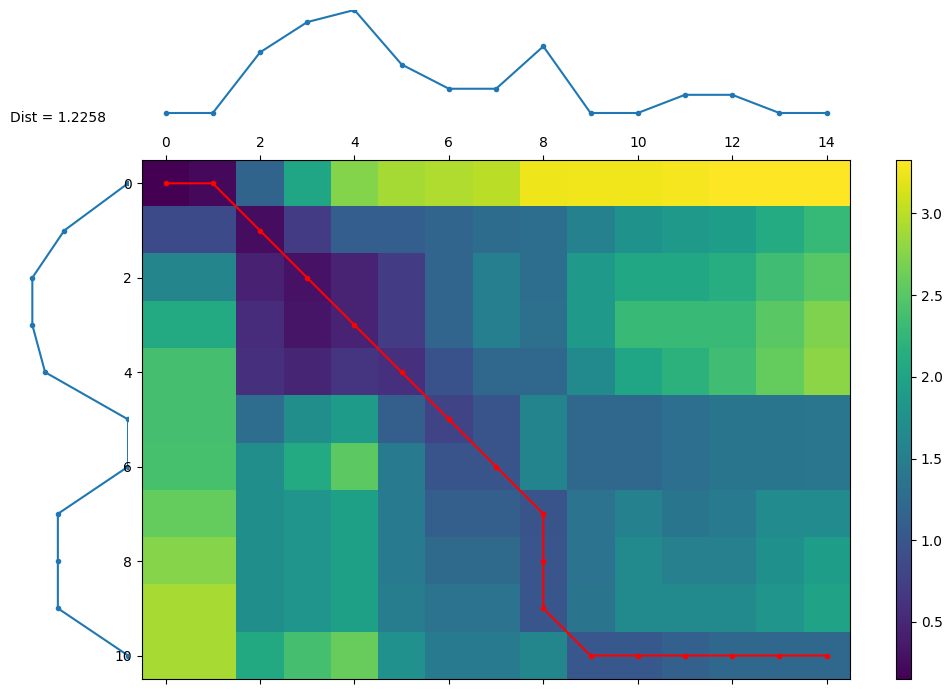

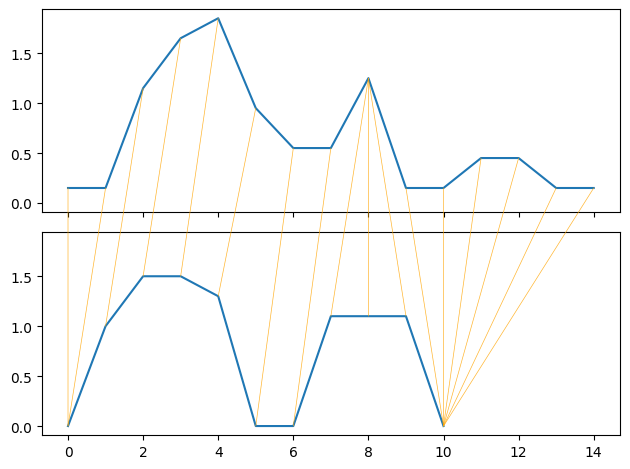

In [6]:
apply_and_present_dtw(x, y, dtw_params_default)

#### Test DTW from dtw_missing:

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.2257650672131262


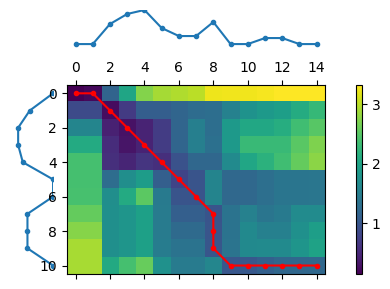

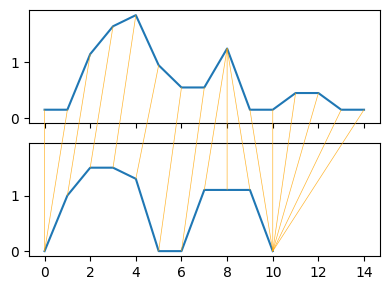

In [7]:
apply_and_present_dtw_missing(x, y, dtw_params_default)

#### Test DTW from dtw_missing with precomputed cost matrix:

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.2257650672131262


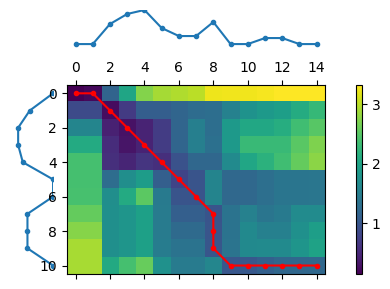

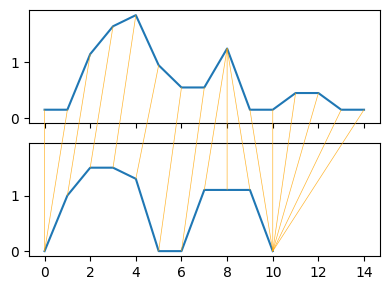

In [8]:
apply_and_present_dtw_missing(x, y, dtw_params_default, precompute_cost_matrix=True)

### Time series with missing data:

In [9]:
x_m = x.copy()
y_m = y.copy()
x_m[2:4] = np.nan
y_m[7:8] = np.nan

#### Test DTW-AROW from dtw_missing:



1 of 9:
some missing values - 1

x = [0.15 0.15  nan  nan 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.2736459135267848


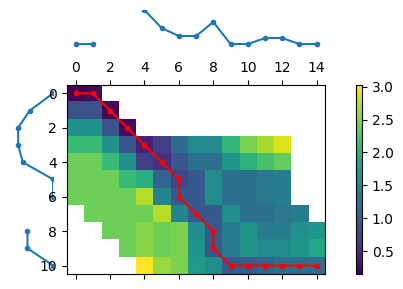

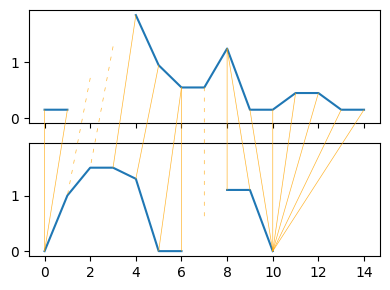



2 of 9:
some missing values - 2

x = [0.15 0.15  nan  nan  nan  nan  nan 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 nan nan nan nan nan 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.5069630055180518


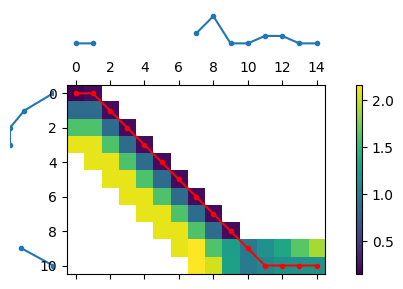

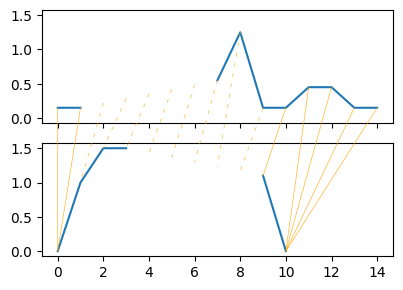



3 of 9:
impossible path

x = [0.15 0.15  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = inf
no plots because paths_ is not computed due to infinity distance


4 of 9:
missing values at the beginning of x

x = [ nan  nan  nan  nan 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.371876617828824


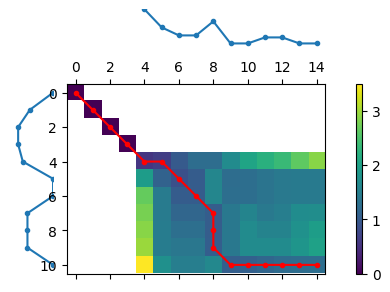

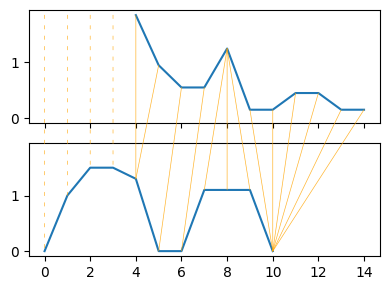



5 of 9:
missing values at the beginning of y

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [nan nan nan nan nan 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.592168332809066


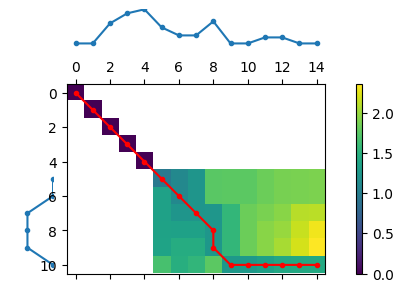

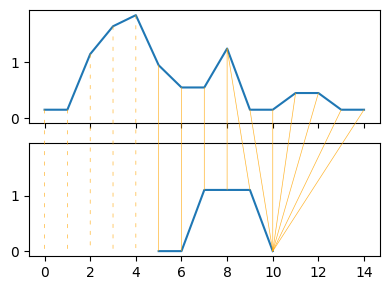



6 of 9:
missing values at the end of x

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55  nan  nan  nan  nan  nan  nan
  nan]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.7817791227044004


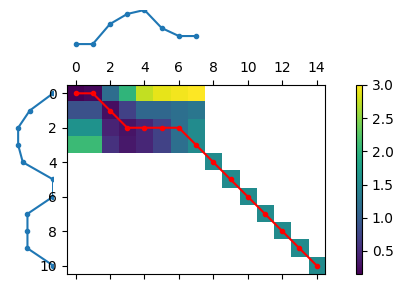

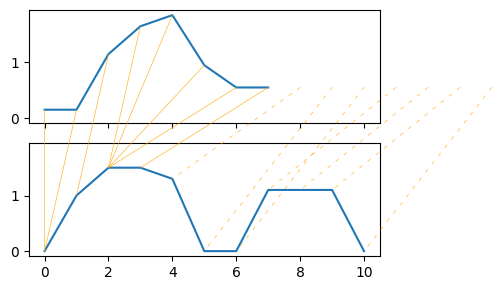



7 of 9:
missing values at the end of y

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.334762491640707


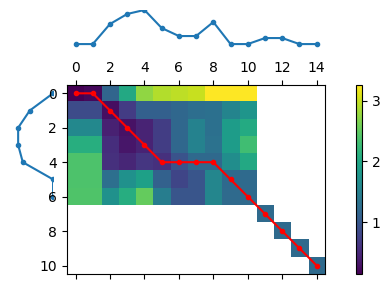

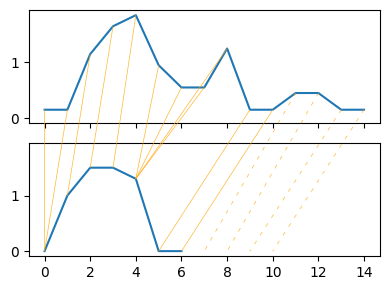



8 of 9:
missing values at the beginning and end - 1

x = [ nan  nan 1.15 1.65 1.85 0.95 0.55 0.55 1.25  nan  nan  nan  nan  nan
  nan]
y = [nan 1.  1.5 1.5 1.3 0.  0.  1.1 nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 1.6787537894862026


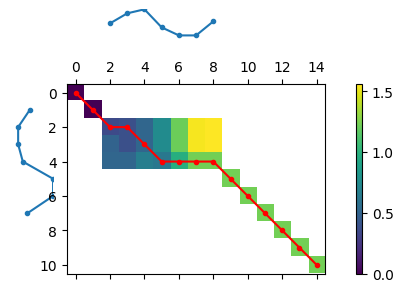

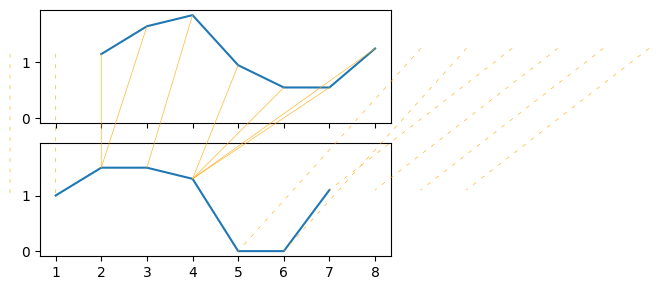



9 of 9:
missing values at the beginning and end - barely possible warping

x = [ nan  nan 1.15 1.65 1.85 0.95 0.55 0.55  nan  nan  nan  nan  nan  nan
  nan]
y = [nan nan nan 1.5 1.3 0.  0.  nan nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False}
distance = 2.4200206610688264


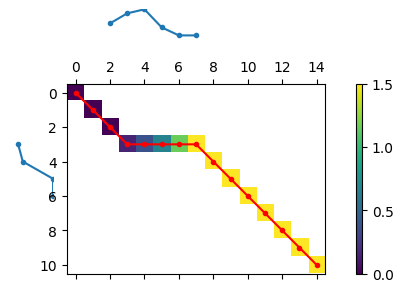

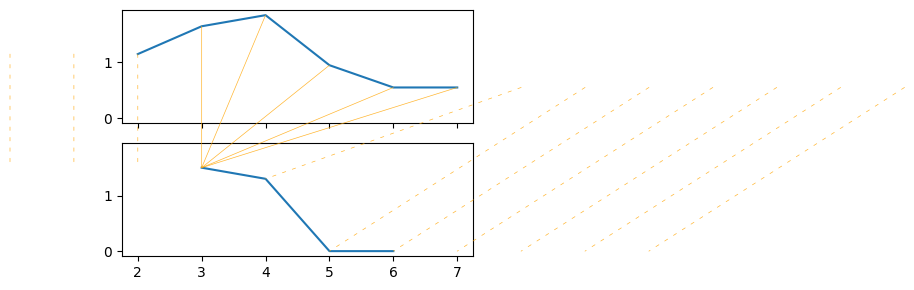

In [10]:
xL = len(x)
yL = len(y)
experiment_config = \
    [
        {'name': 'some missing values - 1', 
         'x_missing_inds': np.r_[2:4],
         'y_missing_inds': np.r_[7:8], 
         'dtw_params': dtw_params_default},
        {'name': 'some missing values - 2', 
         'x_missing_inds': np.r_[2:7],
         'y_missing_inds': np.r_[4:9], 
         'dtw_params': dtw_params_default},
        {'name': 'impossible path', 
         'x_missing_inds': np.r_[2:12],
         'y_missing_inds': np.r_[7:8], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the beginning of x', 
         'x_missing_inds': np.r_[0:4],
         'y_missing_inds': [], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the beginning of y', 
         'x_missing_inds': [],
         'y_missing_inds': np.r_[0:5], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the end of x',
         'x_missing_inds': np.r_[8:xL],
         'y_missing_inds': [], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the end of y',
         'x_missing_inds': [],
         'y_missing_inds': np.r_[7:yL], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the beginning and end - 1',
         'x_missing_inds': np.r_[0:2, 9:xL],
         'y_missing_inds': np.r_[0:1, 8:yL], 
         'dtw_params': dtw_params_default},
        {'name': 'missing values at the beginning and end - barely possible warping',
         'x_missing_inds': np.r_[0:2, 8:xL],
         'y_missing_inds': np.r_[0:3, 7:yL], 
         'dtw_params': dtw_params_default},
    ]

for i, e in enumerate(experiment_config):
    print(f"\n\n{i+1} of {len(experiment_config)}:\n{e['name']}\n")
    x_m = x.copy()
    y_m = y.copy()
    x_m[e['x_missing_inds']] = np.nan
    y_m[e['y_missing_inds']] = np.nan
    apply_and_present_dtw_missing(x_m, y_m, e['dtw_params'])
    plt.show()

#### Test DTW with partial restrictions on warping (i.e., a relaxed version of DTW-AROW) using dtw_missing:



1 of 9:
some missing values - 1

x = [0.15 0.15  nan  nan 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.2736459135267848


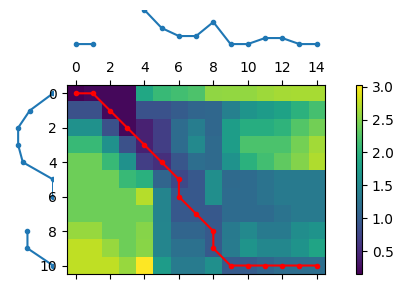

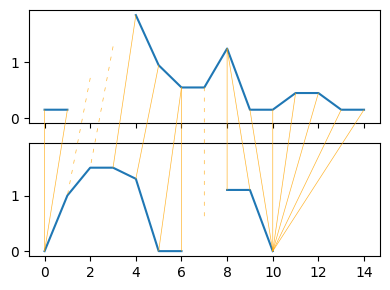



2 of 9:
some missing values - 2

x = [0.15 0.15  nan  nan  nan  nan  nan 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 nan nan nan nan nan 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 0.912585612422199


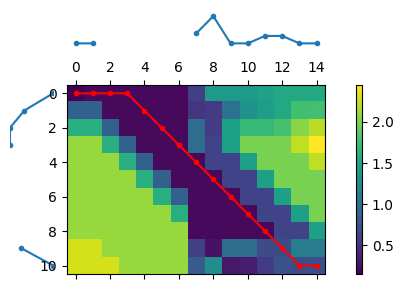

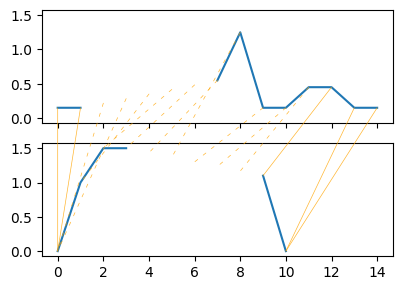



3 of 9:
impossible path

x = [0.15 0.15  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 0.7120393247567158


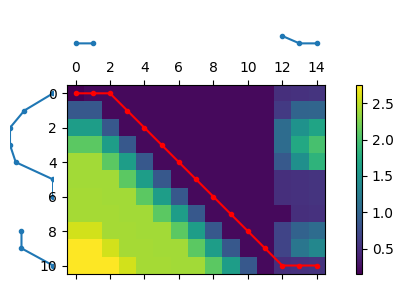

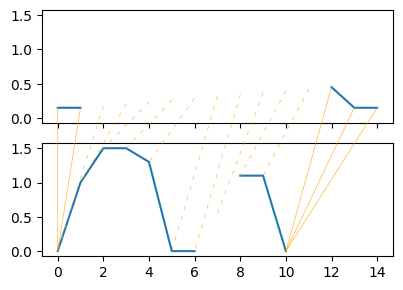



4 of 9:
missing values at the beginning of x

x = [ nan  nan  nan  nan 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.2920209680257442


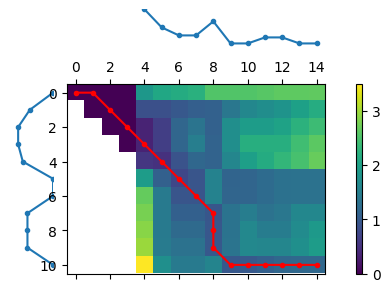

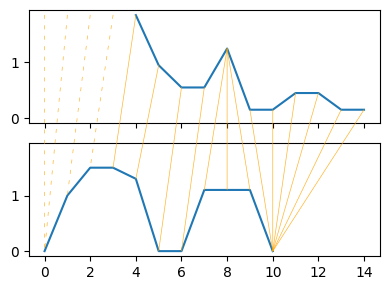



5 of 9:
missing values at the beginning of y

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [nan nan nan nan nan 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.592168332809066


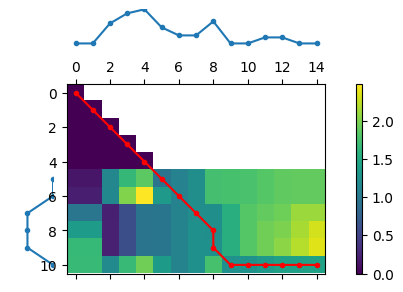

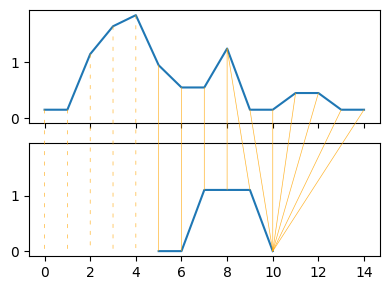



6 of 9:
missing values at the end of x

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55  nan  nan  nan  nan  nan  nan
  nan]
y = [0.  1.  1.5 1.5 1.3 0.  0.  1.1 1.1 1.1 0. ]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.1341586262395944


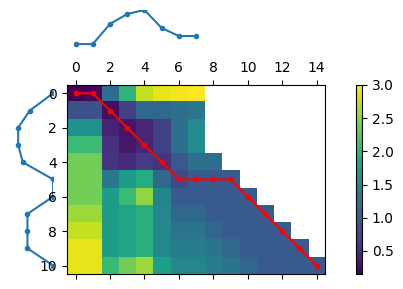

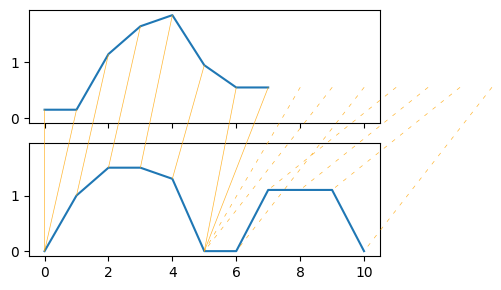



7 of 9:
missing values at the end of y

x = [0.15 0.15 1.15 1.65 1.85 0.95 0.55 0.55 1.25 0.15 0.15 0.45 0.45 0.15
 0.15]
y = [0.  1.  1.5 1.5 1.3 0.  0.  nan nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.334762491640707


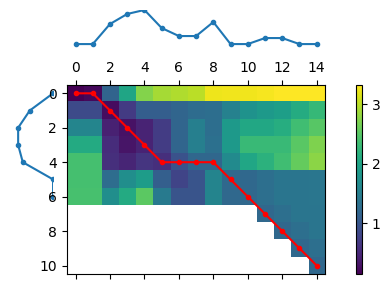

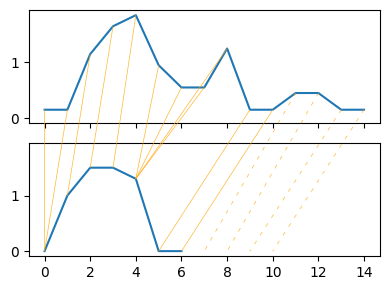



8 of 9:
missing values at the beginning and end - 1

x = [ nan  nan 1.15 1.65 1.85 0.95 0.55 0.55 1.25  nan  nan  nan  nan  nan
  nan]
y = [nan 1.  1.5 1.5 1.3 0.  0.  1.1 nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.305346150041655


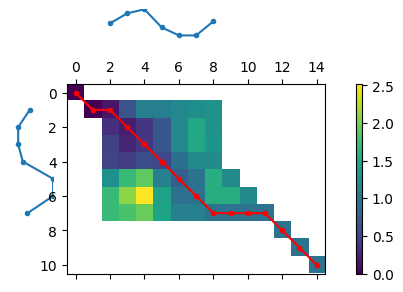

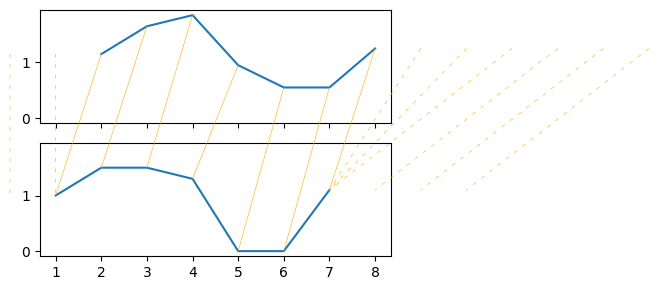



9 of 9:
missing values at the beginning and end - barely possible warping

x = [ nan  nan 1.15 1.65 1.85 0.95 0.55 0.55  nan  nan  nan  nan  nan  nan
  nan]
y = [nan nan nan nan nan nan  0. nan nan nan nan]
dtw_params = {'window': None, 'max_dist': None, 'use_pruning': False, 'max_step': None, 'max_length_diff': None, 'penalty': None, 'psi': None, 'psi_neg': True, 'use_c': False, 'use_ndim': False, 'missing_value_restrictions': 'partial'}
distance = 1.4990473165123432


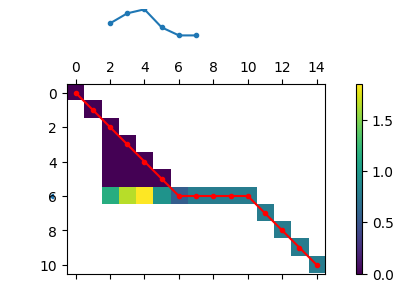

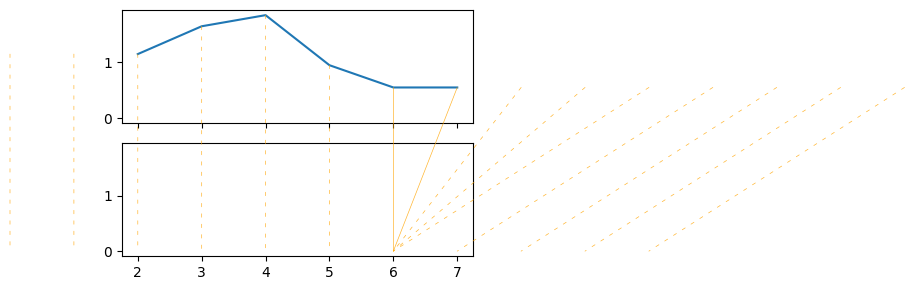

In [11]:
dtw_params_partialrestrictions = dtw_params_default.copy()
dtw_params_partialrestrictions.update({'missing_value_restrictions': 'partial'})

xL = len(x)
yL = len(y)
experiment_config = \
    [
        {'name': 'some missing values - 1', 
         'x_missing_inds': np.r_[2:4],
         'y_missing_inds': np.r_[7:8], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'some missing values - 2', 
         'x_missing_inds': np.r_[2:7],
         'y_missing_inds': np.r_[4:9], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'impossible path', 
         'x_missing_inds': np.r_[2:12],
         'y_missing_inds': np.r_[7:8], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the beginning of x', 
         'x_missing_inds': np.r_[0:4],
         'y_missing_inds': [], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the beginning of y', 
         'x_missing_inds': [],
         'y_missing_inds': np.r_[0:5], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the end of x',
         'x_missing_inds': np.r_[8:xL],
         'y_missing_inds': [], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the end of y',
         'x_missing_inds': [],
         'y_missing_inds': np.r_[7:yL], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the beginning and end - 1',
         'x_missing_inds': np.r_[0:2, 9:xL],
         'y_missing_inds': np.r_[0:1, 8:yL], 
         'dtw_params': dtw_params_partialrestrictions},
        {'name': 'missing values at the beginning and end - barely possible warping',
         'x_missing_inds': np.r_[0:2, 8:xL],
         'y_missing_inds': np.r_[0:6, 7:yL], 
         'dtw_params': dtw_params_partialrestrictions},
    ]

for i, e in enumerate(experiment_config):
    print(f"\n\n{i+1} of {len(experiment_config)}:\n{e['name']}\n")
    x_m = x.copy()
    y_m = y.copy()
    x_m[e['x_missing_inds']] = np.nan
    y_m[e['y_missing_inds']] = np.nan
    apply_and_present_dtw_missing(x_m, y_m, e['dtw_params'])
    plt.show()